In [22]:
import pandas as pd
import matplotlib.pyplot as plt
from pybats.analysis import analysis
from pybats.point_forecast import median
from pybats.plot import plot_data_forecast, ax_style

In [23]:
# Load the dataset
file_path = '../data/owid-covid-data.csv'
df = pd.read_csv(file_path, parse_dates=True)
df = df[['date', 'new_deaths']]

df.set_index('date', inplace=True)
df = df.groupby('date').sum().reset_index()


# Changing the datatype
df["date"] = pd.to_datetime(df['date'], format='%Y-%m-%d')

# Setting the Date as index
# df = df.set_index('date')

Y = df['new_deaths'].values

In [24]:
k = 1 # forecasting one step ahead
forecast_start = 0 # starting forecast at time step 0
forecast_end = len(df)-1 # ending forecast at the same time our data ends

mod, samples = analysis(
    Y,
    family="poisson", #the family of the distribution to be used
    forecast_start=forecast_start,
    forecast_end=forecast_end,
    k=k,
    nsamps=100, # number of samples we draw for each month
    prior_length=6, # number of points that define the prior distribution
    rho=.9, # random effect extension
    deltrend=0.5, # discount factor for trend component
    delregn=0.9 # discount factor for regression component
)

forecast = median(samples)

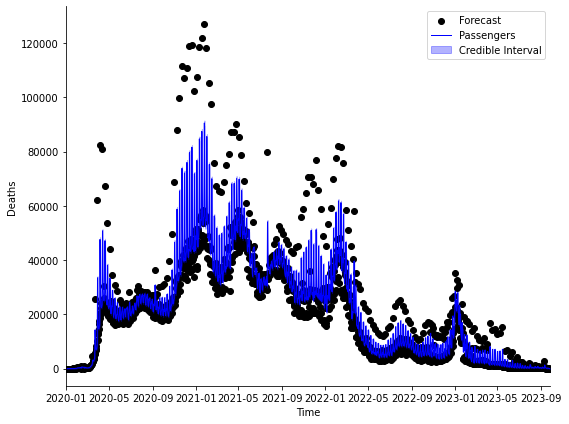

In [25]:
# Plotting
fig, ax = plt.subplots(1,1, figsize=(8, 6))   
ax = plot_data_forecast(fig, ax, Y, forecast, samples,
                        dates=df['date'].values,)
ax = ax_style(ax, ylabel='Deaths', xlabel='Time',
              legend=['Forecast', 'Deaths', 'Credible Interval'])

In [27]:
from sklearn.metrics import mean_squared_error
from math import sqrt
df['new_deaths'].mean()
rmse=sqrt(mean_squared_error(forecast,samples))
print(rmse)

ValueError: Found input variables with inconsistent numbers of samples: [1366, 100]